<a href="https://colab.research.google.com/github/ZaqueMendes/Quant/blob/main/Vale3_e_Ibov_Predi%C3%A7%C3%A3o_e_alguns_estudos_estatisticos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Estudo de VALE3 através de Regressão Linear e Machine Learning




**Metodologia**

# Separar Valores de Abertura, Alta, Baixa e Volume da VALE3 durante o último ano e valores a serem previstos para ação.


# 75% dos dados aleatoriamente serão utilizados para treinamento da máquina e o restante para teste usando o Modelo de regressão linear.

# Predizer 21 resultados

# Predizer a margem de erro

# Testar um setut de operação com a (média das pedrições - margem de erro) como entrada, mínima das predições como Stop e Máxima como Gain por 21 pregões.

...

Obs.:


O Beta representa o quanto o retorno de um ativo varia proporcionalmente à variação do mercado em geral (padrão de ações no Brasil: Ibov)  

---

### Cálculo
A fórmula do Beta é a covariância entre os retornos do ativo e do mercado dividida pela variância dos retornos do mercado.

Mas a forma mais fácil de calcular é realizar a regressão do ativo em relação ao índice e encontrar o coeficiente da fórmula linear encontrada. Em uma regressão linear:

*Y = constante + Beta * X + erro*

Ou seja, o retorno do ativo (Y) é depende, simplesmente, de um fator beta aplicado ao retorno do mercado (menor o beta, menor o retorno esperado, bem como menor o risco).   

---
O Beta é usado no CAPM para precificação de ativos:

*Retorno esperado do ativo = Ret. RF + Beta (Ret. Mercado - Ret. RF)*

In [ ]:
!pip install pandas-datareader
!pip install --upgrade pandas-datareader
!pip install yfinance

In [ ]:
import pandas_datareader as pdr
import yfinance as yf
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [ ]:
# Início e fim
#start = datetime.date(2015,1,1).isoformat()
#end = datetime.date(2022,8,27).isoformat()
start = '2021-09-08'
end = '2022-09-06'

In [ ]:
# Recupera dados
ibov = pdr.get_data_yahoo('^BVSP', start=start, end=end)
vale = pdr.get_data_yahoo('VALE3.SA', start=start, end=end)

In [ ]:
vale

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-08,96.730003,94.699997,96.470001,95.040001,22635100.0,78.823578
2021-09-09,95.720001,93.169998,95.160004,94.699997,28997700.0,78.541588
2021-09-10,96.190002,94.809998,95.510002,94.809998,18022000.0,78.632820
2021-09-13,95.000000,93.940002,94.699997,94.760002,18832800.0,78.591354
2021-09-14,95.580002,93.070000,95.150002,94.089996,25571600.0,78.035667
...,...,...,...,...,...,...
2022-08-31,65.680000,64.500000,65.419998,64.500000,33242900.0,64.500000
2022-09-01,63.980000,61.900002,63.980000,63.889999,40922200.0,63.889999
2022-09-02,64.820000,62.919998,64.489998,62.919998,49910300.0,62.919998


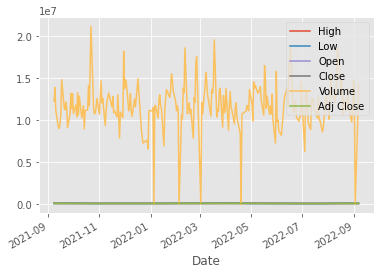

In [ ]:
ibov.plot()

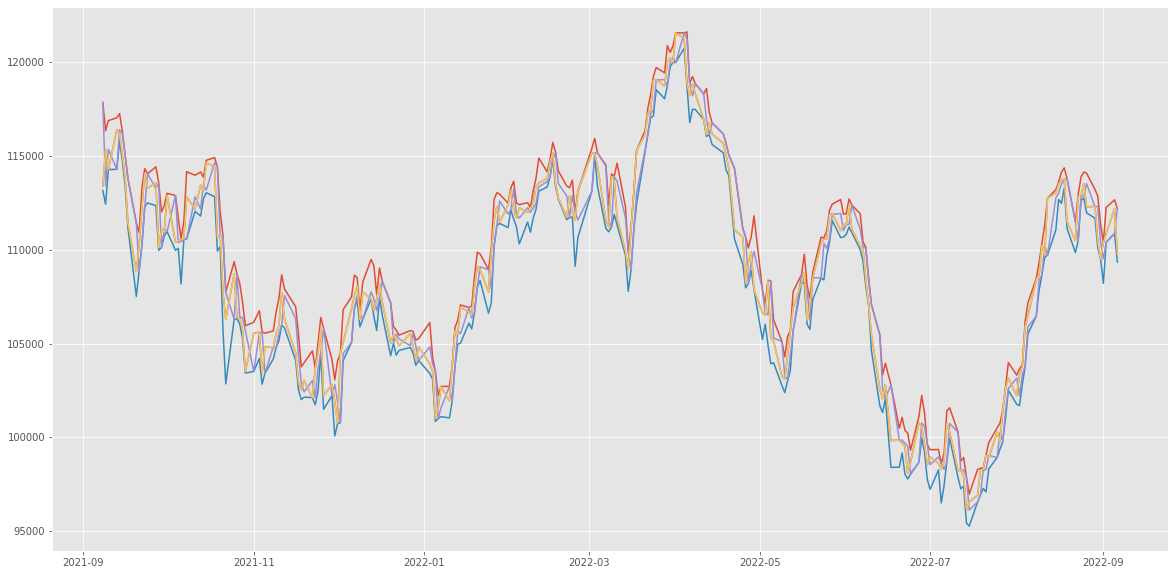

In [ ]:



plt.figure(figsize=(20,10))
plt.plot(ibov.loc[:,[col for col in ibov.columns if col != "Volume"]])

In [ ]:
import plotly.graph_objects as go

df = pd.read_csv('https://raw.githubusercontent.com/ZaqueMendes/Quant/main/VALE3.SA.csv')



fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])


#fig.update_layout(title_text='VALE3') 



fig.update_layout(
    title='VALE3',
    yaxis_title='Valor',
    shapes = [dict(
        x0='2022-01-01', x1='2022-09-06', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2022-01-01', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Increase Period Begins')]
)

fig.show()

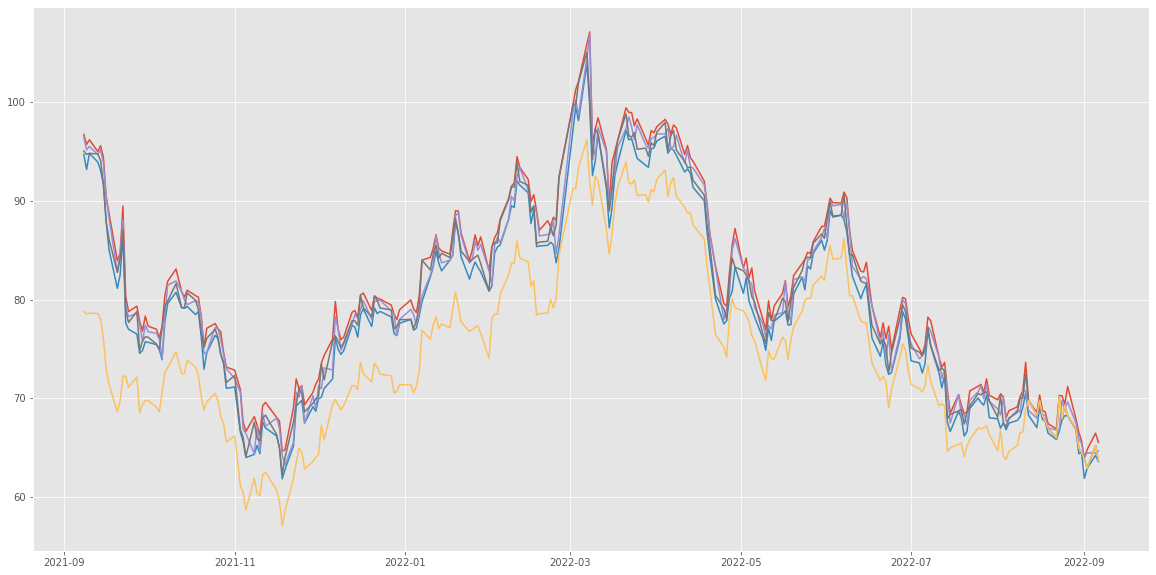

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(vale.loc[:,[col for col in vale.columns if col != "Volume"]])

In [ ]:
!pip install plotly==4.14.3
!pip install "notebook>=5.3" "ipywidgets>=7.5"
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=go.Ohlc(
    x=ibov.index,
    open=ibov['Open'],
    high=ibov['High'],
    low=ibov['Low'],
    close=ibov['Close']))
fig.show()

## Regressão Linear

Imagine a relação entre horas de estudos e resultado acadêmico.  
Quanto mais horas de estudo, melhor o resultado. Pode-se tentar estabelecer uma relação linear entre ambas variáveis.

In [ ]:
# Criação da coluna Var
vale['var'] = vale['Adj Close'].pct_change()
vale = vale.dropna()

ibov['var'] = ibov['Adj Close'].pct_change()
ibov = ibov.dropna()

In [ ]:
import statsmodels.api as sm
import numpy as np

Y = vale['var']
X = ibov['var']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



const   -0.000516
var      0.984537
dtype: float64

In [ ]:
ibov['var'].size

249

In [ ]:
vale['var'].size

249

In [ ]:
vale['var'].index.difference(ibov['var'].index)

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
# Eliminando as linhas estranhas
df = pd.concat(
    {'ibov':ibov['var'], 'vale':vale['var']},
    join='inner', # INNER VAI DESCARTAR OS DIAS EM QUE TEMOS UMA VARIÁVEL E NÃO A OUTRA
    axis=1
)

In [ ]:
df

,ibov,petr
Date,,
2022-01-04,-0.003926,0.003781
2022-01-05,-0.024229,-0.038699
2022-01-06,0.005495,-0.000712
2022-01-07,0.011402,0.004635
2022-01-10,-0.007535,-0.006033
...,...,...
2022-08-26,-0.010860,0.010817
2022-08-29,0.000214,0.024970
2022-08-30,-0.016844,-0.059455


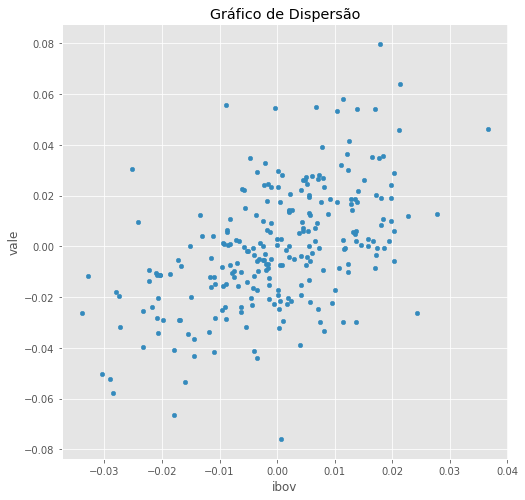

In [ ]:
df.plot.scatter('ibov','vale', title = 'Gráfico de Dispersão' , figsize=(8,8))

In [ ]:
# Efetuando a regressão para o período)
import statsmodels.api as sm
import numpy as np

Y = df.vale
X = df.ibov
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



const   -0.000516
ibov     0.984537
dtype: float64

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   vale   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     89.42
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           2.61e-18
Time:                        22:43:58   Log-Likelihood:                 612.84
No. Observations:                 249   AIC:                            -1222.
Df Residuals:                     247   BIC:                            -1215.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.001     -0.393      0.695      -0.003       0.002
ibov           0.9845      0.104      9.456      0.000       0.779       1.190
==============================================================================
Omnibus:                        5.838   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                7.803
Skew:                           0.136   Prob(JB):                       0.0202
Kurtosis:                       3.824   Cond. No.                         79.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Regressão em janela móvel
# Para isso, usaremos a fórmula de beta (covariancia sobre variancia)

def calc_beta(df):
    np_array = df.values
    m = np_array[:,0]
    s = np_array[:,1]

    covariance = np.cov(s,m)
    beta = covariance[0,1]/covariance[1,1]
    return beta


# Cálculo para período total bate com o da regressão do statsmodels
calc_beta(df)

0.984537283276824

In [ ]:
# Janela que percorre o dataframe

def rolling_apply(df, period, func, min_periods=None):
    if min_periods is None:
        min_periods = period
    result = pd.Series(np.nan, index=df.index)

    for i in range(1, len(df)+1):
        sub_df = df.iloc[max(i-period, 0):i,:] 
        if len(sub_df) >= min_periods:
            idx = sub_df.index[-1]
            result[idx] = func(sub_df)
    return result

df['beta'] = np.nan
period = 252
beta = rolling_apply(df[['ibov','vale']], period, calc_beta, min_periods = period)  
beta.name = 'beta'
df.update(beta)

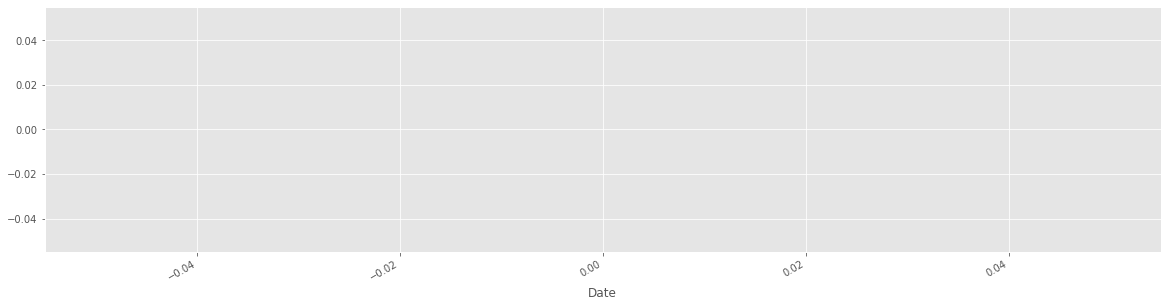

In [ ]:
df.beta.dropna().plot(figsize=(20,5))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#import numpy as np  


In [ ]:
# Carrega o arquivo csv para um pandas dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/ZaqueMendes/Quant/main/VALE3.SA.csv')
# Converte o campo Date de string para o formato datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Mostra a tabela do Ativo
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-08,96.470001,96.730003,94.699997,95.040001,78.823578,22635100
1,2021-09-09,95.160004,95.720001,93.169998,94.699997,78.541588,28997700
2,2021-09-10,95.510002,96.190002,94.809998,94.809998,78.632820,18022000
3,2021-09-13,94.699997,95.000000,93.940002,94.760002,78.591354,18832800
4,2021-09-14,95.150002,95.580002,93.070000,94.089996,78.035667,25571600
...,...,...,...,...,...,...,...
245,2022-08-31,65.419998,65.680000,64.500000,64.500000,64.500000,33242900
246,2022-09-01,63.980000,63.980000,61.900002,63.889999,63.889999,40922200
247,2022-09-02,64.489998,64.820000,62.919998,62.919998,62.919998,49910300
248,2022-09-05,64.449997,66.480003,64.230003,65.220001,65.220001,24319700


In [ ]:
# Separa Valores lidos, e valor a ser previsto
atributos = ['Open', 'High', 'Low', 'Volume']
# Variável a ser prevista
atrib_prev = ['Adj Close']
# Criando objetos
x = dataset[atributos].values
y = dataset[atrib_prev].values

# Divide 75% dos dados aleatoriamente para treino e o restante para teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(x, y, random_state=42)

##Treinamento da máquina
# Modelo de regressão linear
modelo = LinearRegression()
# Treina o modelo
modelo.fit(X_treino, y_treino)


# Predizer 21 resultados

predicao = (modelo.predict(X_teste[:21]))




#print(modelo.predict(X_teste[:21]))

print(predicao)

mediapredicao = sum(predicao) / len(predicao)


#print("A média é =",sum(predicao) / len(predicao));

print("A média é =", mediapredicao);


# Validando o modelo
# usando mean_squared_error
RMSE = mean_squared_error(y_teste, modelo.predict(X_teste))**0.5
print("Média de erro {0}".format(RMSE))

pontoentrada = mediapredicao - RMSE

#Media - Erro  =  Entrada
print("O ponto de entrada é comprar abaixo de: ", pontoentrada)


[[87.79309809]
 [81.78603956]
 [77.71693834]
 [69.99006148]
 [79.75179391]
 [81.71967602]
 [69.7185256 ]
 [81.99957481]
 [76.97747728]
 [83.65134951]
 [73.20495348]
 [64.08948393]
 [64.3274071 ]
 [64.53187226]
 [71.40752753]
 [65.06115777]
 [71.5336064 ]
 [71.22138636]
 [77.75286092]
 [74.08889336]
 [60.59331536]]
A média é = [73.75795234]
Média de erro 2.6827442602351437
O ponto de entrada é comprar abaixo de:  [71.07520808]


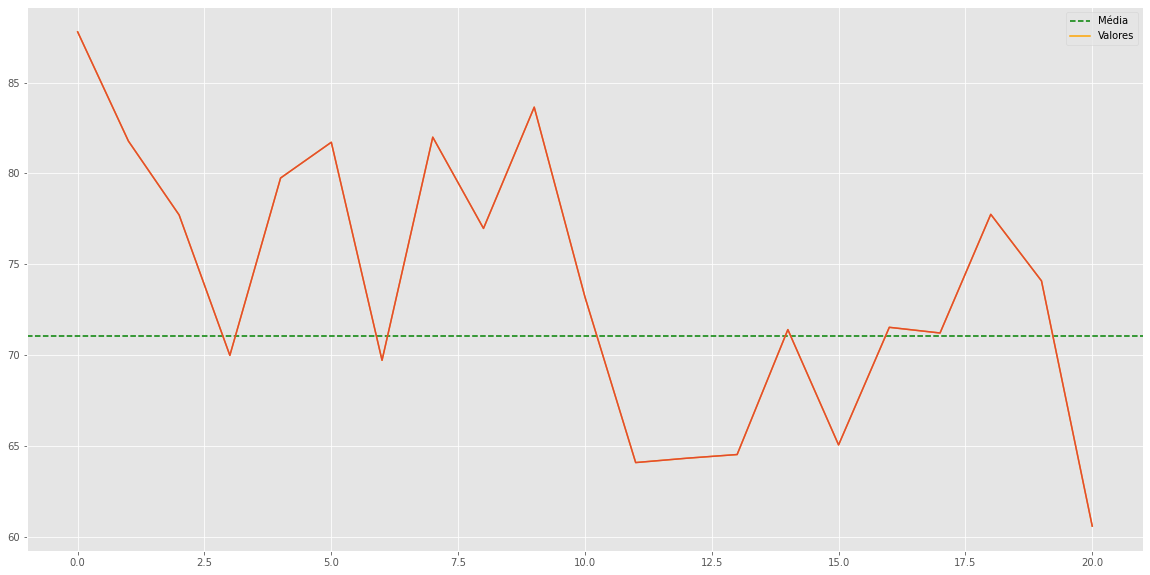

In [ ]:
#Grafico de 21 Pregões com as predições
#Testar entrada abaixo da mínima da média do período Linha Verde




plt.figure(figsize=(20,10))

plt.axhline(y = pontoentrada, color = 'g', linestyle = '--', label = 'Média') 


plt.plot(predicao, color = 'orange',  label ='Valores')
# plt.plot(x, label ='Pregões')

plt.legend()


plt.plot(predicao)